Community detection using Girwan Newman Algorithm  
Steps:
1. Define betweenneess mesure for each edge
2. Find the edge with maximum betweenness and remove it
3. Recalculate and repeat

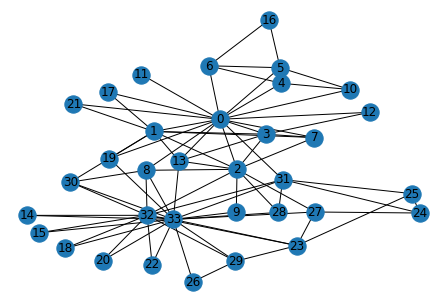

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx
G = nx.karate_club_graph()
nx.draw_kamada_kawai(G, with_labels=True)

In [2]:
btw_centrality = nx.algorithms.centrality.edge_betweenness_centrality(G)
sorted(btw_centrality.items(), key = lambda item:item[1], reverse = True)[0:10]

[((0, 31), 0.1272599949070537),
 ((0, 6), 0.07813428401663695),
 ((0, 5), 0.07813428401663694),
 ((0, 2), 0.0777876807288572),
 ((0, 8), 0.07423959482783014),
 ((2, 32), 0.06898678663384543),
 ((13, 33), 0.06782389723566191),
 ((19, 33), 0.05938233879410351),
 ((0, 11), 0.058823529411764705),
 ((26, 33), 0.0542908072319837)]

Removing the edge ((0, 31), 0.1272599949070537)
Removing the edge ((0, 2), 0.11924273983097515)
Removing the edge ((0, 8), 0.13782067605597018)
Removing the edge ((13, 33), 0.14617273782105492)
Removing the edge ((19, 33), 0.21966651886437982)
Removing the edge ((2, 32), 0.1786195286195287)
Removing the edge ((1, 30), 0.25601957954899124)
Removing the edge ((1, 2), 0.1947415329768271)
Removing the edge ((2, 3), 0.19191919191919182)
Removing the edge ((2, 7), 0.25445632798573975)
Removing the edge ((2, 13), 0.5080213903743315)


[{2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
 {0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}]

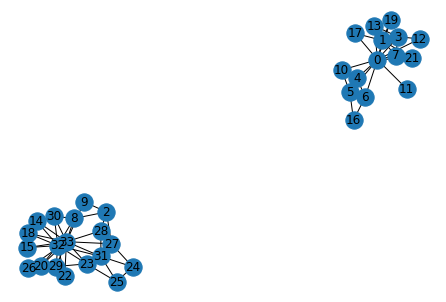

In [3]:
G = nx.karate_club_graph()
def girwan_newman(G, no_of_components_to_split):
    while(no_of_components_to_split > nx.algorithms.components.number_connected_components(G)):
        # Calculate the betweenness centrality
        btw_centrality = nx.algorithms.centrality.edge_betweenness_centrality(G)
        # sort based on betweenness centrality
        sorted_edges = sorted(btw_centrality.items(), key = lambda item:item[1], reverse = True)[0]
        print('Removing the edge', sorted_edges)
        # remove edge which has highest centrality
        G.remove_edge(*sorted_edges[0])

    # Check if graph is split
    if(no_of_components_to_split <= nx.algorithms.components.number_connected_components(G)):
        # Plot the graph with both the nodes having different colors
        nx.draw_spring(G, with_labels=True)
        # return list of nodes in each community
#         components = nx.algorithms.components.connected_components(G)
        list_of_nodes = [c for c in sorted(nx.connected_components(G), key=len, reverse=True)]
#         print(nx.algorithms.components.node_connected_component(G, 16))
#         print(nx.algorithms.components.node_connected_component(G, 11))
        return list_of_nodes
communities = girwan_newman(G, 2)
communities

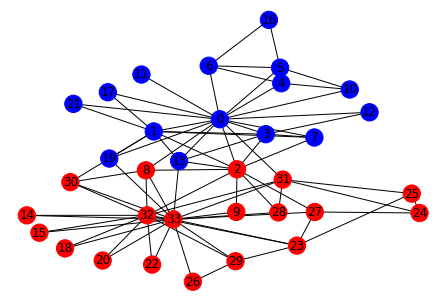

In [4]:
# Reinstanciste G if necessary
G = nx.karate_club_graph()

# Colors for edges
colors_for_edges = 'rbgoy'
pos = nx.spring_layout(G)
for i, nodes in enumerate(communities):
    for node in nodes:
        G.add_node(node,node_color = colors_for_edges[i])   
nx.draw_kamada_kawai(G, with_labels=True, node_color = list(nx.get_node_attributes(G,'node_color').values()))

## Using inbuilt functions

In [5]:
karate_club_split = nx.algorithms.community.centrality.girvan_newman(G)
karate_club_split_tuple = tuple(sorted(c) for c in next(karate_club_split))
karate_club_split_tuple

([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

0
1


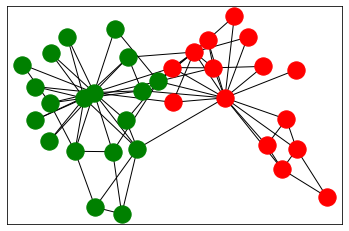

In [6]:
colors = 'rgb'
for i, nodes in enumerate(karate_club_split_tuple):
    print(i)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes, node_color=colors[i])
    
nx.draw_networkx_edges(G,pos=pos)

## Ratio cut quick
$$ Ratio\,Cut\, (P_{Red}) = \frac{1}{number\_of\_partitions}\times (\frac{no\_of\_edges\_in\_partition1}{no\_of\_nodes\_in\_partition1} + \frac{no\_of\_edges\_in\_partition2}{no\_of\_nodes\_in\_partition2} + ..) $$
Lesser is better

In [7]:
from networkx.algorithms import community
communities = community.kernighan_lin_bisection(G, max_iter=100)

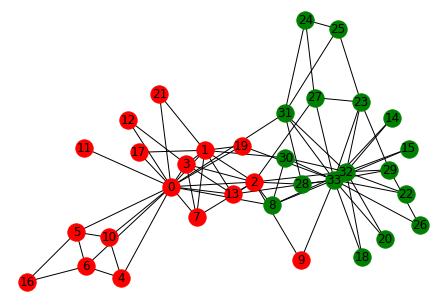

In [8]:
pos = nx.spring_layout(G)
nx.draw(G,pos, with_labels=True, node_size =100, node_color='w', node_shape = '.')

for i in range(len(communities)):
    nx.draw_networkx_nodes(G, pos, nodelist=communities[i], node_color=colors[i])

In [9]:
# How many ideal nodes: Louvain package
from community import community_louvain
# https://en.wikipedia.org/wiki/Louvain_method
community_louvain.best_partition(G)

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 2,
 5: 2,
 6: 2,
 7: 0,
 8: 1,
 9: 0,
 10: 2,
 11: 0,
 12: 0,
 13: 0,
 14: 1,
 15: 1,
 16: 2,
 17: 0,
 18: 1,
 19: 0,
 20: 1,
 21: 0,
 22: 1,
 23: 1,
 24: 3,
 25: 3,
 26: 1,
 27: 1,
 28: 3,
 29: 1,
 30: 1,
 31: 3,
 32: 1,
 33: 1}

In [10]:
# !pip install python-louvain